## 

# Load the Heart Disease UCI dataset into a Pandas DataFrame.


In [2]:
import pandas as pd
import numpy as np
feature_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = pd.read_csv("C:\\Users\\Abdo\\Downloads\\heart+disease\\processed.cleveland.data", names=feature_names)

# Handle missing values (removal).

In [3]:
unwanted_values = ["?", "NA", "N/A", "n/a", "na"]
df_cleared = df.replace(unwanted_values, np.nan)
df_cleared = df_cleared.dropna()

# Convert all columns to numeric, then to int
for col in df_cleared.columns:
	df_cleared[col] = pd.to_numeric(df_cleared[col])


# Perform data encoding (one-hot encoding for categorical variables).

In [4]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df_encoded = pd.get_dummies(df_cleared, columns=categorical_cols, drop_first=True)

# Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps and boxplots.

## creating boxplots

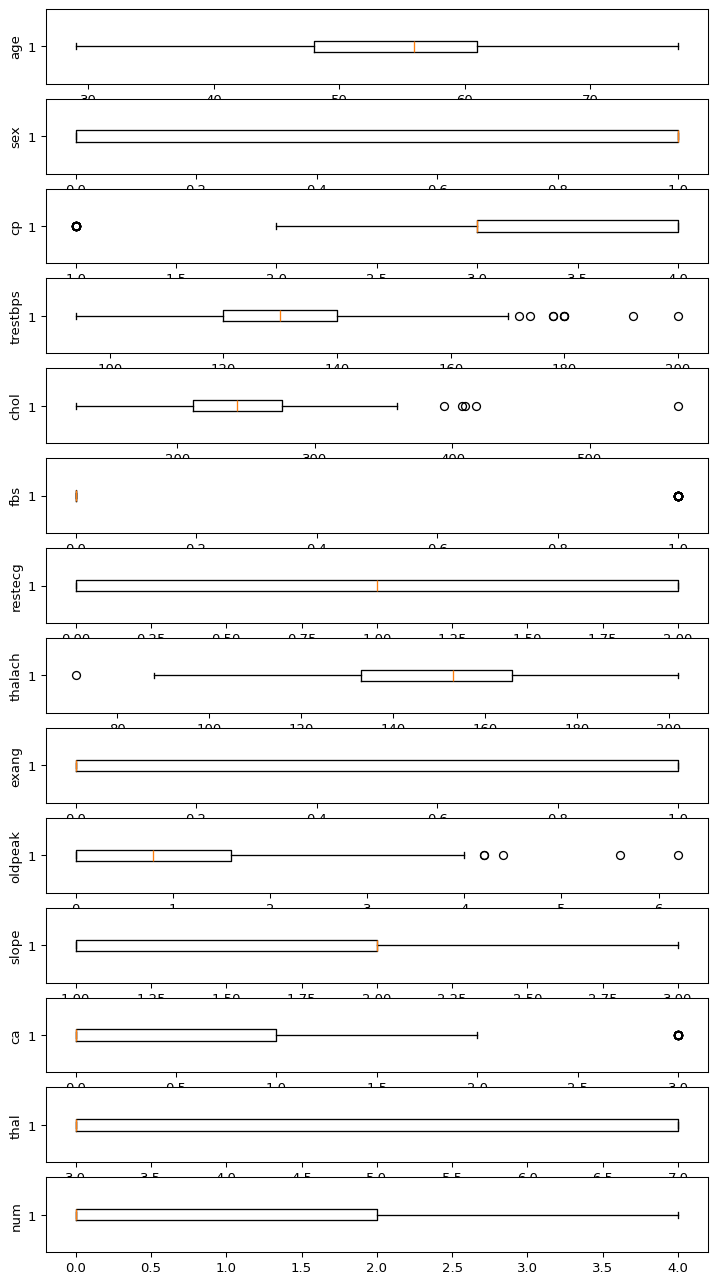

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box Plots
fig, axs = plt.subplots(len(df_cleared.columns),1,dpi=95, figsize=(9,17))
i = 0
for col in df_cleared.columns:
    axs[i].boxplot(df_cleared[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

## clear the outliers

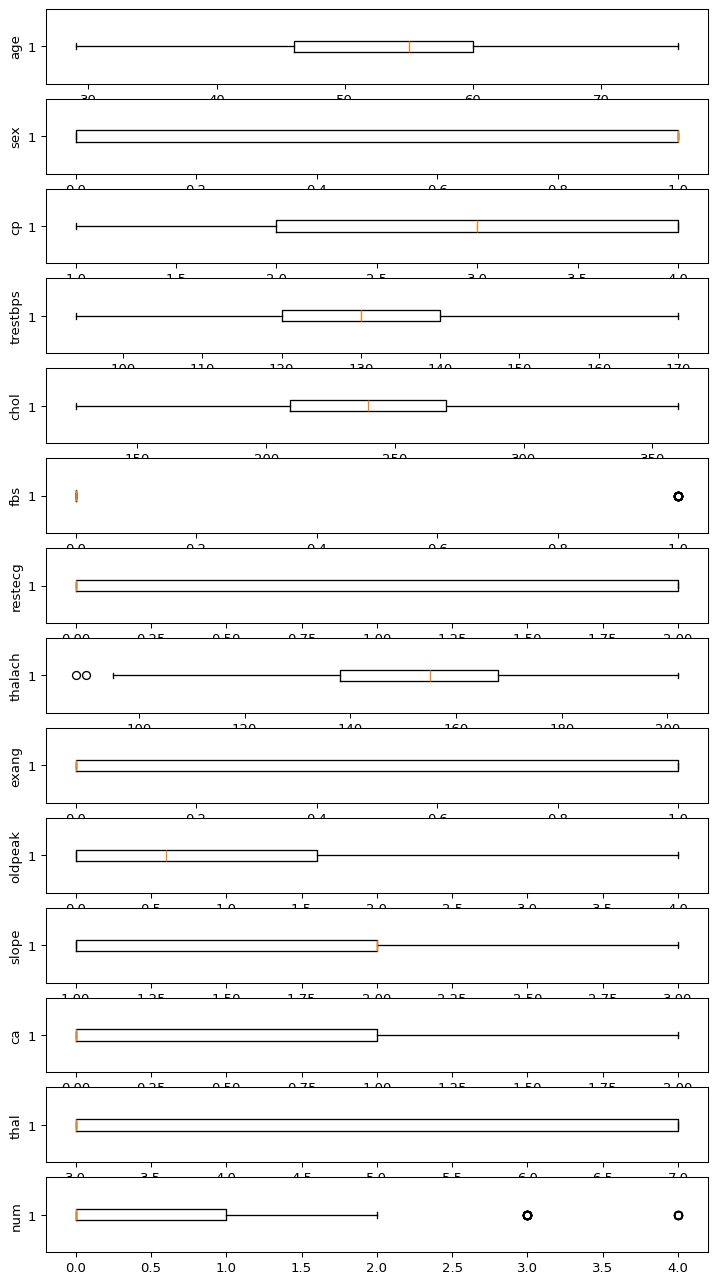

In [6]:
import pandas as pd
import numpy as np
# These are the columns where we will remove outliers
numerical_cols_to_clean = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']


for col in numerical_cols_to_clean:
    # Identifying the quartiles
    q1, q3 = np.percentile(df_cleared[col], [25, 75])

    # Calculate the interquartile range
    iqr = q3 - q1

    # Calculating the lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Droping the outliers 
    df_cleared = df_cleared[(df_cleared[col] >= lower_bound) & (df_cleared[col] <= upper_bound)]

# checking Box Plots
fig, axs = plt.subplots(len(df.columns),1,dpi=95, figsize=(9,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df_cleared[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

## creating heat maps

<Axes: >

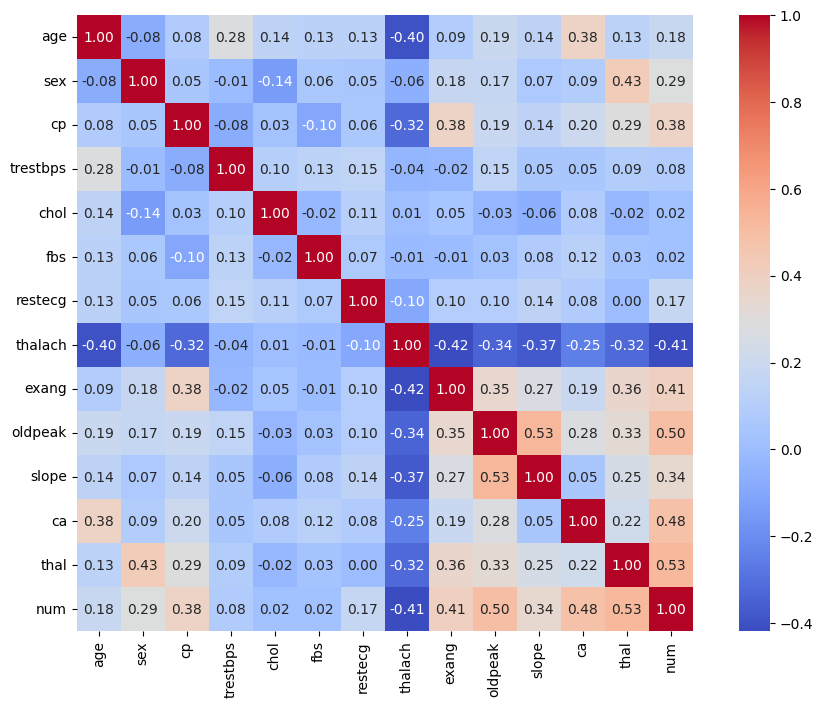

In [10]:
import seaborn as sns
# creating heat maps
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleared.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Standardize numerical features using MinMaxScaler

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler , StandardScaler
# Scaling the DataFrame
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleared)
#print(np.mean(df_scaled), np.std(df_scaled),df_scaled.shape)
df_scaled = pd.DataFrame(df_scaled, columns=df_cleared.columns)
df_scaled.head()
#df_scaled.to_csv("C:\\Users\\Abdo\\OneDrive - Faculty of Engineering Ain Shams University\\Desktop\\Personal\\learning\\Sprint_Up_AI\\Heart_disease_project\\data\\data.csv", index=False)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1.019996,0.680946,-2.152509,0.995001,-0.208619,2.634273,1.042919,-0.045833,-0.674949,1.300852,2.365950,-0.705921,0.721121,-0.713499
1,1.463546,0.680946,0.912477,-0.618980,-0.298702,-0.379611,1.042919,-0.979814,1.481594,1.590340,0.717336,2.075300,1.243038,0.155974
2,-1.863079,0.680946,-0.109185,0.026612,0.174236,-0.379611,-0.966234,1.599751,-0.674949,2.458803,2.365950,-0.705921,-0.844628,-0.713499
3,-1.419529,-1.468546,-1.130847,0.026612,-0.861724,-0.379611,1.042919,0.932622,-0.674949,0.432390,-0.931278,-0.705921,-0.844628,-0.713499
4,0.243783,0.680946,-1.130847,-0.618980,-0.141056,-0.379611,-0.966234,1.199474,-0.674949,-0.146585,-0.931278,-0.705921,-0.844628,-0.713499


## creating histograms

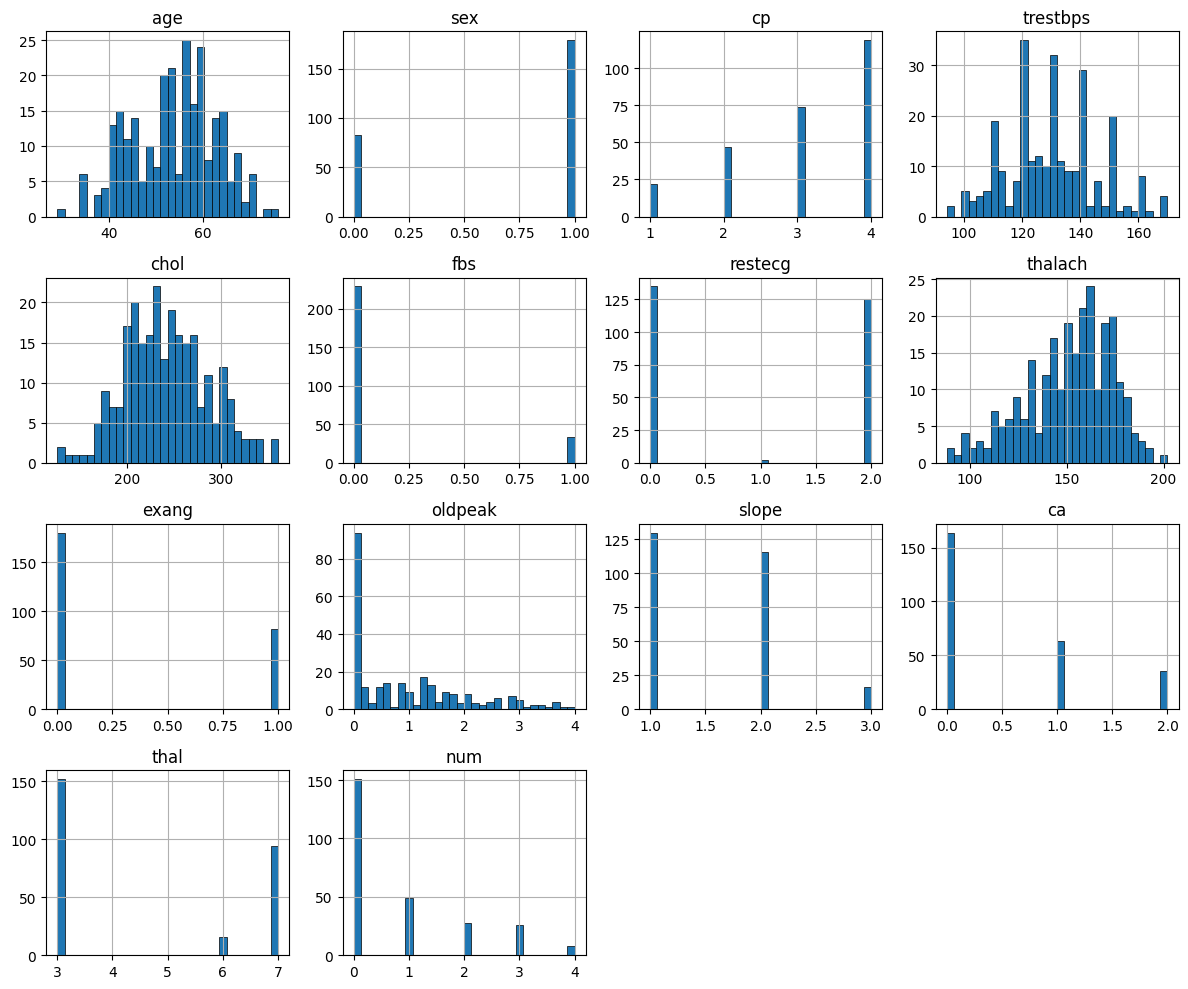

In [15]:
# creating histograms
df_cleared.hist(figsize=(12, 10), bins=30, edgecolor='black', linewidth=0.5)
plt.tight_layout()